# Numerically solving the Schrodinger equation

In this assignment you will use [<tt>qmsolve</tt>](https://github.com/quantum-visualizations/qmsolve) to solve the time-independent Schrodinger equation in one dimension and plot the solutions.

### First, install <tt>qmsolve</tt> in one of two ways:
<ul>
    <li>From a <tt>unix</tt> command line, type <tt>pip install qmsolve</tt></li>
    <li>Put the following commands in a code cell in this notebook and execute:<br />
        <tt>import sys</tt><br />
        <tt>!{sys.executable} -m pip install qmsolve</tt></li>
</ul>

### Homework problems:

<ol start=0>
    <li>Follow the link to the <tt>qmsolve</tt> GitHub page above. Click the link for the <tt>examples</tt> folder, then click on the <tt>eigenstate solver examples</tt> folder. Finally, click on <tt>1D_harmonic_oscillator.py</tt> to see a short code snippet that will calculate wavefunctions for a simple harmonic oscillator (SHO).</li>
    <li><tt>1D_harmonic_oscillator.py</tt> imports the <tt>Hamiltonian</tt> class from <tt>qmsolve</tt>. In quantum mechanics, what is a Hamiltonian? Please use multiple sources to formulate your answer and cite those sources. For this problem, crowd-sourced references such as Wikipedia and stackexchange are acceptable.</li>
    <li>Which force law is defined in the function <tt>harmonic_oscillator()</tt> in cell 2 of this notebook?</li>
    <li>What are the eigenstates referred to in lines 22 and 23 in <tt>1D_harmonic_oscillator.py</tt>? Again, please use multiple sources to formulate your answer and cite those sources.
    <li>Code cells 1 and 2 below contain imported code from <tt>1D_harmonic_oscillator.py</tt>, including a visualization of eigenstate 0 of the SHO. In subsequent code cells, plot any five SHO eigenstates of your choice.</li>
</ol>

Note: you can write your answers to the non-code problems in a markdown cell. From within a new notebook cell, click the box with a double arrow that says "Code" and change to "Markdown". Then you can just type in the cell like a regular text file.

**Answers to above questions:**

1) The Hamiltonian, denoted $ \hat{H} $, is an operator that corresponds to the total energy of a given system, including kinetic and potential. For a one particle system, $ \hat{H} $ = $ \hat{T} $ + $ \hat{V} $, where $ \hat{T} $ is the kinetic energy operator, and $ \hat{V} $ is the potential energy operator.

$ \hat{T} $ = (**$ \hat{p} $** ***$ \hat{p} $**)/2m = $ \frac{-ℏ^2}{2m} * $ $ \frac{∂^2}{∂x^2}$

and

$ \hat{V} $ = V(r, t)

Combined, these form the common format of the Schrodinger Wave Equation.

Sources:

http://hyperphysics.phy-astr.gsu.edu/hbase/quantum/hamil.html

https://en.wikipedia.org/wiki/Hamiltonian_(quantum_mechanics)


2) The force law described in harmonic_oscillator() is the spring potential law, $ \frac{1}{2}$k$x^2$.

3) An eigenstate is a special state or wave function that, when acted upon by an operator, returns the same eigenstate multiplied by a constant. These eigenstates form a basis for all possible quantum states, meaning that any given quantum state can be represented as a linear combination of these eigenstates.

Sources:

https://phys.libretexts.org/Bookshelves/Quantum_Mechanics/Introductory_Quantum_Mechanics_(Fitzpatrick)/03%3A_Fundamentals_of_Quantum_Mechanics/3.08%3A_Eigenstates_and_Eigenvalues#:~:text=The%20fact%20that%20the%20variance,is%20simply%20the%20associated%20eigenvalue.

https://physics.stackexchange.com/questions/485299/what-are-the-eigenstates-and-eigenvalues

4) Done below

In [1]:
import sys
!{sys.executable} -m pip install qmsolve

  Preparing metadata (setup.py) ... done
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12065 sha256=f6c3b962d6610fe22e98fb1d686a0f41add9869f0d2aed83a82b0dad6e8348a7
  Stored in directory: /root/.cache/pip/wheels/8d/bb/b2/5353b966ac6f3c5e1000629a9a5f6aed41794487f551e32efc
Successfully built progressbar


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from qmsolve import Hamiltonian, SingleParticle, init_visualization, Å, eV

Computing...
Took 0.3273591995239258
[ 13.8243627   41.46350403  69.08346722  96.68423227 124.26577906
 151.82808744 179.37113718 206.89490796 234.39937942 261.8845311
 289.35034249 316.79679298 344.22386192 371.63152856 399.01977209
 426.38857162 453.73790619 481.06775475 508.3780962  535.66890934
 562.9401729  590.19186555 617.42396585 644.63645231 671.82930335
 699.00249732 726.15601246 753.28982697 780.40391895 807.49826642]


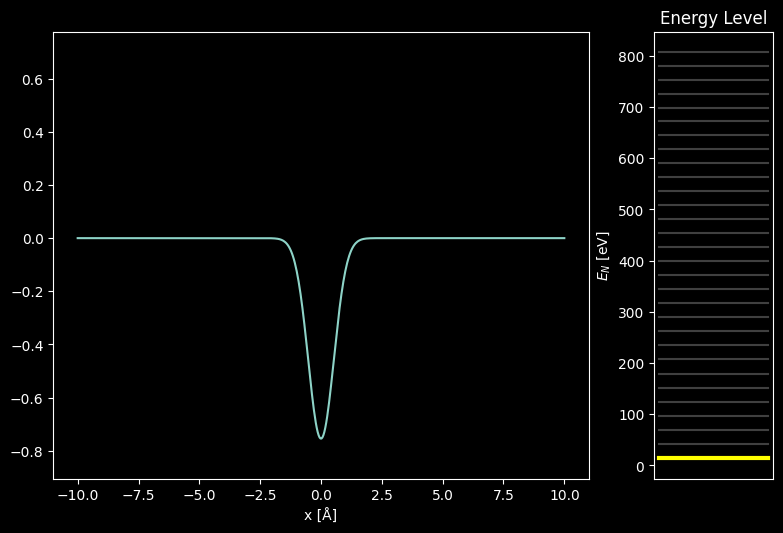

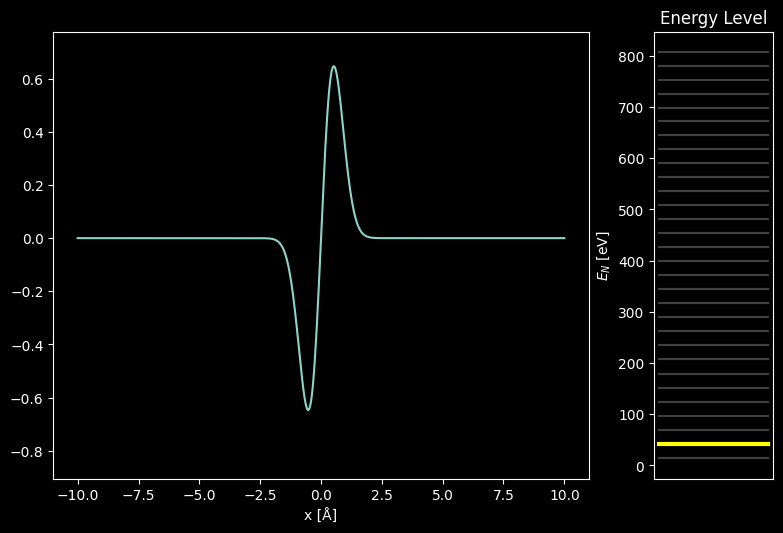

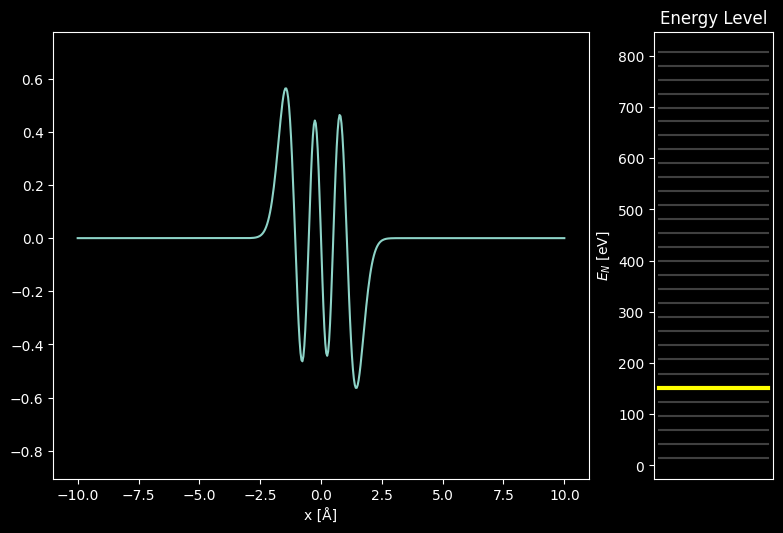

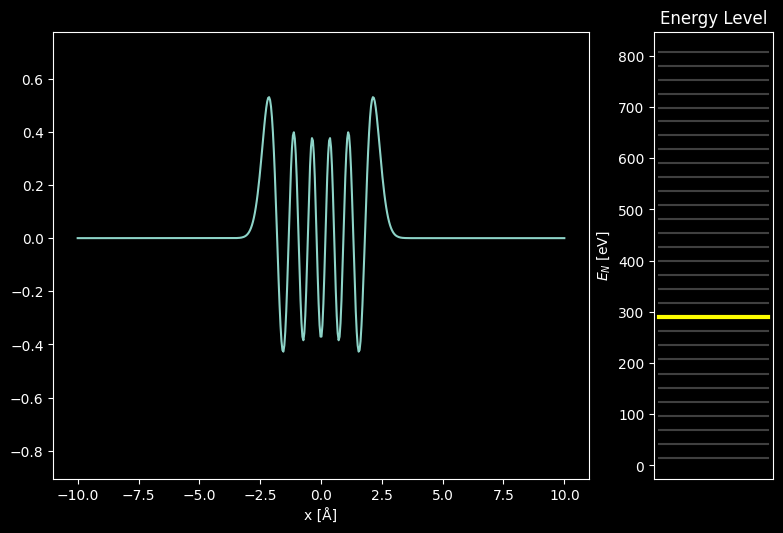

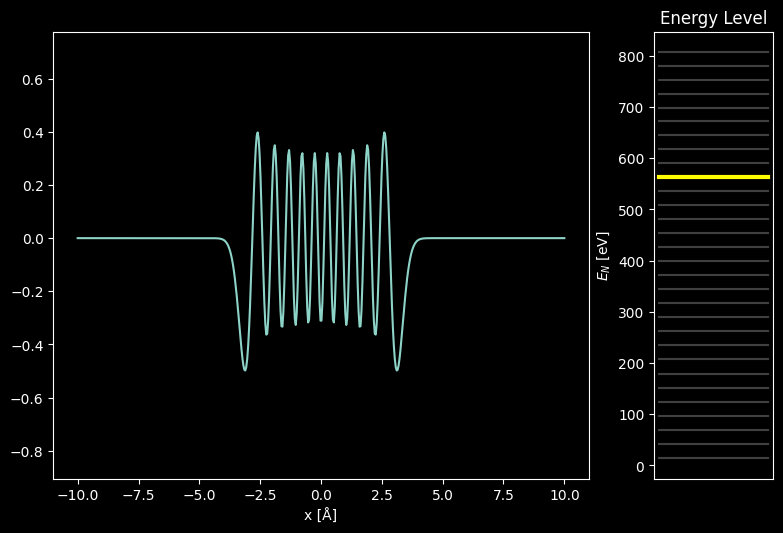

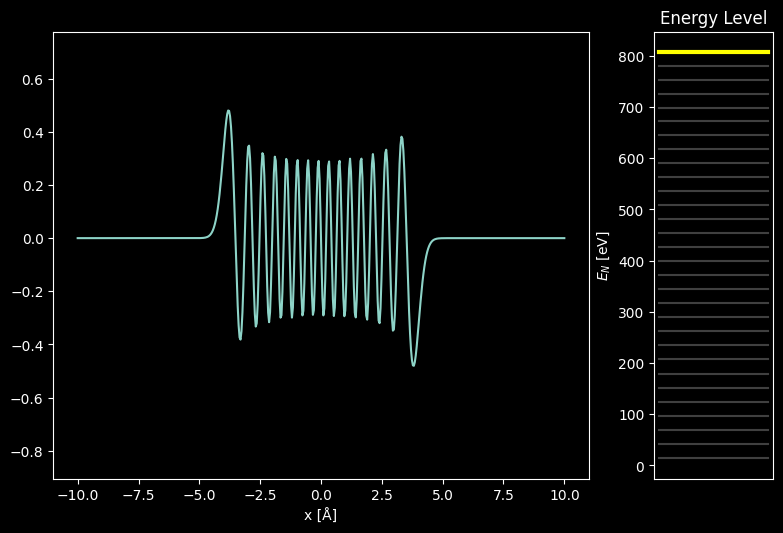

In [13]:
# Harmonic oscillator potential
def harmonic_oscillator(particle):
    k = 100 * eV / Å**2
    return 0.5 * k * particle.x**2

# Define the Hamiltonian
H = Hamiltonian(particles = SingleParticle(), potential = harmonic_oscillator,
                spatial_ndim = 1, N = 512, extent = 20*Å)

#Diagonalize the Hamiltonian and compute the eigenstates
eigenstates = H.solve(max_states = 30)

# Print out the energies of the eigenstates
print(eigenstates.energies) # the printed energies are expressed in eV

# Visualize the Eigenstates
visualization = init_visualization(eigenstates)
visualization.plot_eigenstate(0)

#My 5 of my choosing:
visualization.plot_eigenstate(1)
visualization.plot_eigenstate(5)
visualization.plot_eigenstate(10)
visualization.plot_eigenstate(20)
visualization.plot_eigenstate(29)

<ol start=5>
    <li>What is on the x-axis of your plots?</li>
    <li>Are your plots showing wave functions ψ(x) or probability functions ψ^*(x)ψ(x)? How do you know?</li>
</ol>

### New potential: infinite square well

Below I define the infinite square well potential and plot the two lowest-energy eigenstates (compare to Figure 6.3 in your textbook).

**Answers to above (5 and 6)**

5) The x-axis of these plots shows the x location of a particle, measured in angstroms.

6) I believe the plots are showing the wave functions ψ(x), not the probability functions. Probability functions must have an area under them of 1. For eigenstate 1, it appears as if there is an equal area below and above the energy in eV 0, meaning the area would add up to zero, meaning it can't be a probability function. So, it leads me to conclude that the code is plotting the wave function ψ(x).

Computing...
Took 0.0068225860595703125
[  0.58926935   2.35704264   5.30321556   9.4276143   14.7299955
  21.21004635  28.8673845   37.70155819  47.71204619  58.89825789
  71.2595333   84.79514311  99.50428872 115.3861023  132.43964681
 150.6639161  170.05783494 190.6202591  212.34997539 235.24570176
 259.30608737 284.52971266 310.91508944 338.46066097 367.16480207
 397.0258192  428.04195057 460.21136622 493.53216816 528.00239048]


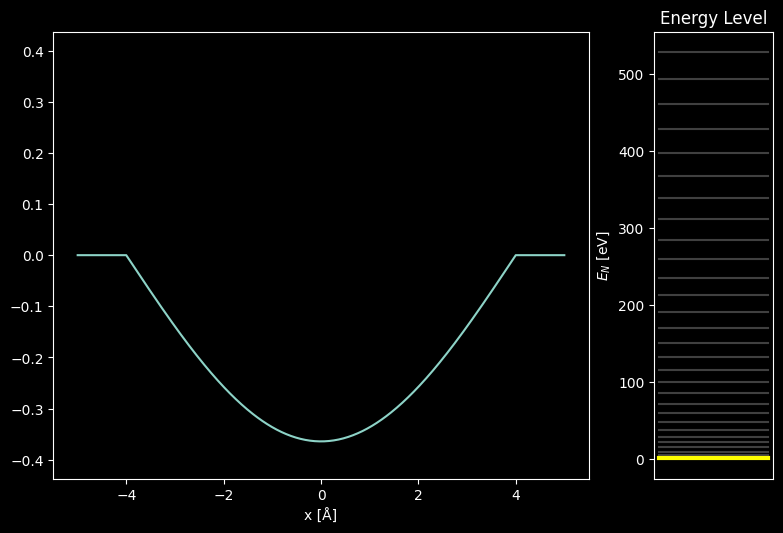

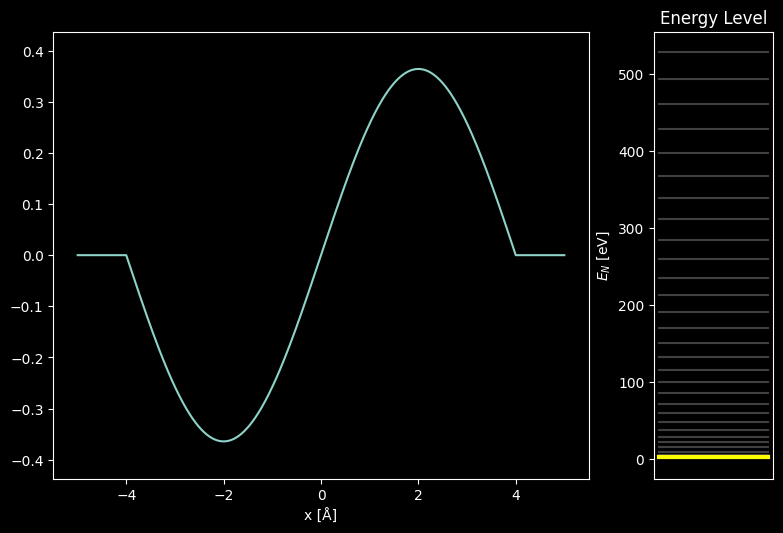

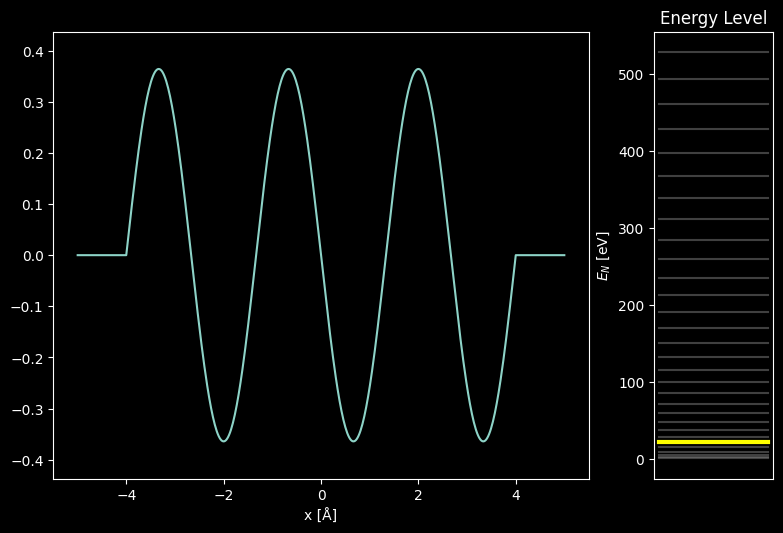

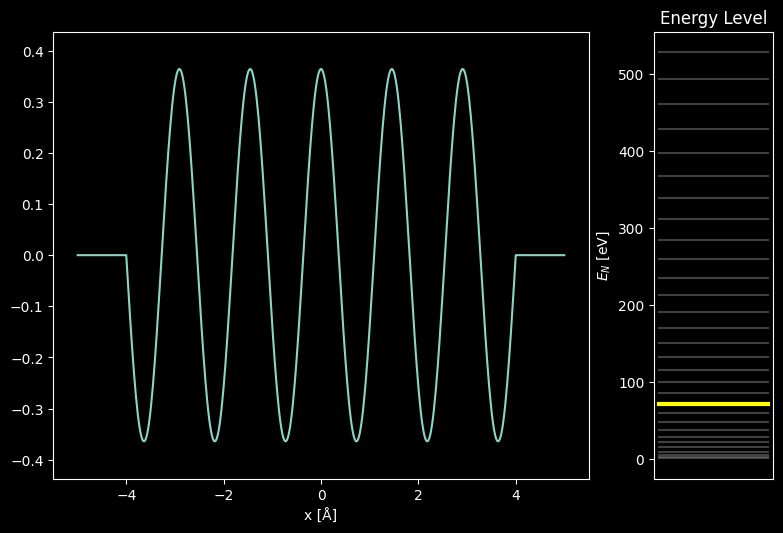

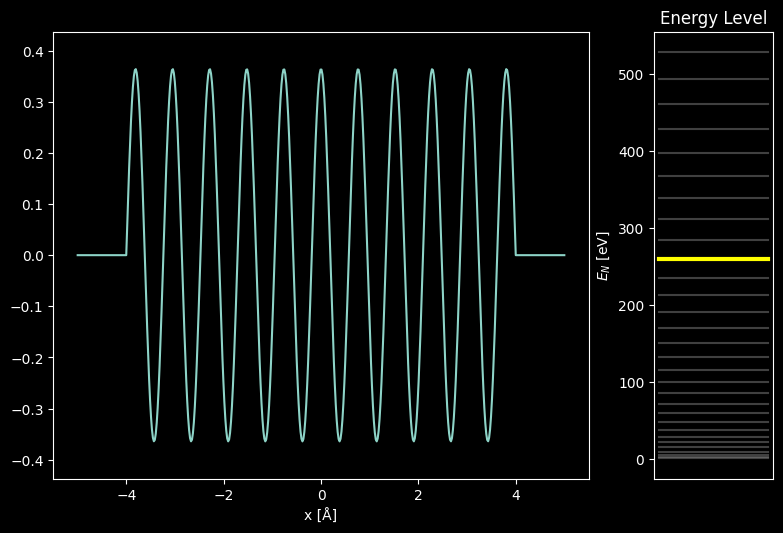

In [14]:
# 8 angstrom-wide infinite square well
def infinite_square_well(particle):
    potential = np.zeros_like(particle.x)
    out_of_bounds = np.abs(particle.x) > 4*Å
    potential[out_of_bounds] = np.inf
    return potential

# Define the Hamiltonian of the infinite square well
H_sw = Hamiltonian(particles = SingleParticle(), potential = infinite_square_well,
                   spatial_ndim = 1, N = 512, extent = 10*Å)

# Diagonalize the Hamiltonian and compute the eigenstates
eigenstates_sw = H_sw.solve(max_states = 30)

print(eigenstates_sw.energies)

# Visualize the infinite square well eigenstates
visualization_sw = init_visualization(eigenstates_sw)
visualization_sw.plot_eigenstate(0)
visualization_sw.plot_eigenstate(1)

#My 3 of my choosing:
visualization_sw.plot_eigenstate(5)
visualization_sw.plot_eigenstate(10)
visualization_sw.plot_eigenstate(20)

<ol start=7>
    <li>Plot any three infinite square well eigenstates of your choice.</li>
    <li>What property do the infinite square well eigenstates have that's different than the SHO eigenstates? (Hint: think about the properties of valid wave functions we discussed in class)</li>
    <li>What is the relationship between the number of extrema (maxima plus minima) in each eigenstate plot and the quantum number of the eigenstate?</li>
</ol>

**Answers to 7, 8, 9**

7) Done above

8) Infinite square well plots must become exactly 0 at the boundary points of the infinite square well. For the SHO eigenstates, however, the plots will asymptotically approach 0 as x goes to infinity or negative infinity, meaning there is technically no boundary where the wave function must stop.

9) For each given eigenstate quantum number, the eigenstate will have (eigenstate quantum #) + 1 extrema.

### Now it's your turn to define a potential

<ol start=10>
    <li>Write a function that defines a <em>finite square-well</em> potential (textbook section 5.4). You can choose the width of the well in Angstroms and the potential at the walls in eV. Calculate the finite square-well Hamiltonian and plot any five eigenstates you choose.</li>
    <li>Based on your plots, do you think a particle can get out of the finite square-well potential no matter its quantum number n?
</ol>

**Answers to 10, 11**

10) Done below

11) Based on these plots, it seems that it is possible for a particle to get out of the finite square-well potential, no matter its quantum number n, as there isn't a hard cutoff at -4 and 4 Å as in the infinite square-well.

Computing...
Took 0.008638143539428711
[  0.51783705   2.06993967   4.65191062   8.25579845  12.86896003
  18.47194753  25.03454031  32.50794593  40.80856948  49.78288832
  59.13647231  68.35948219  76.98179887  85.4182478   94.91262325
 106.14061153 118.84323786 132.53861401 146.84334181 161.50602625
 176.46485441 191.89721407 208.12315563 225.39306376 243.7604806
 263.11424772 283.27062929 304.04857599 325.32646413 347.08735485]


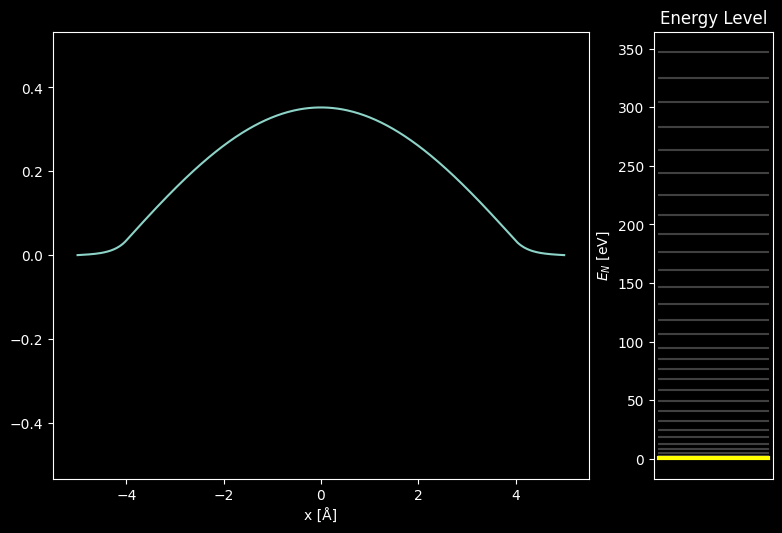

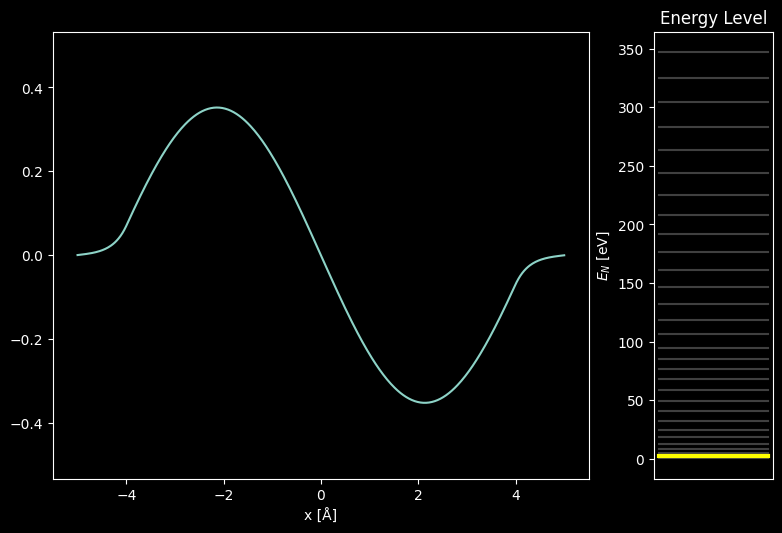

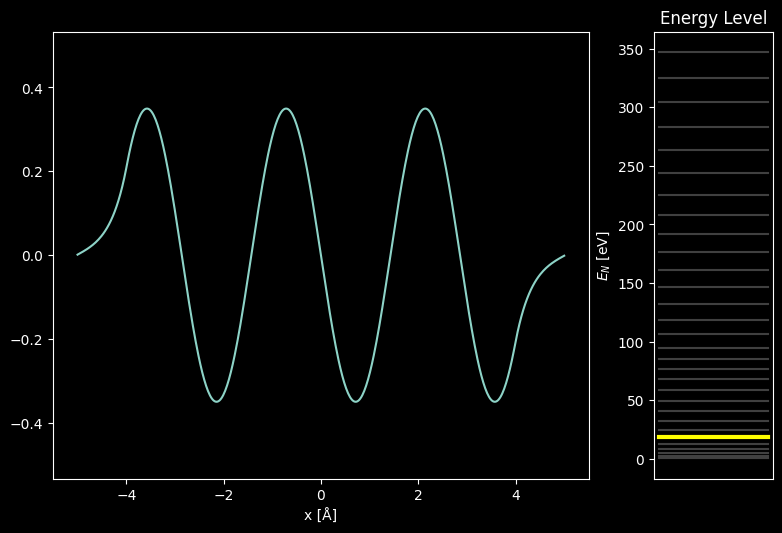

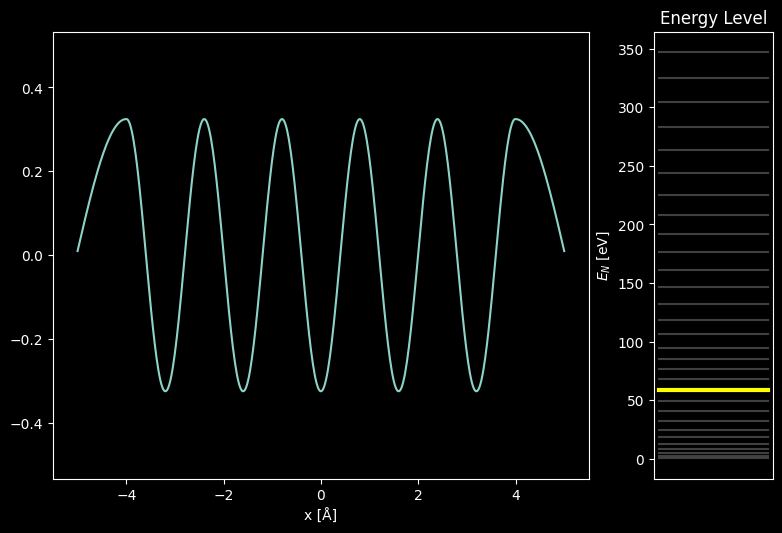

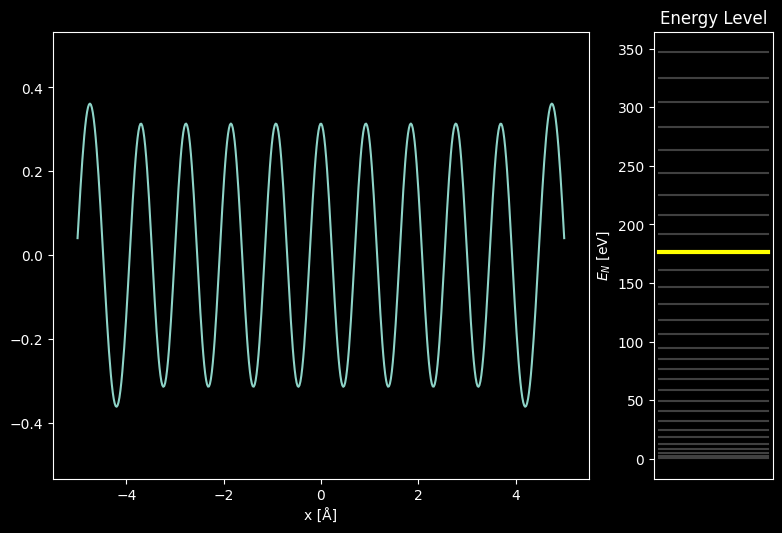

In [17]:
# 8 angstrom-wide finite square well
def finite_square_well(width_angstrom, V0_eV):
    width = width_angstrom * Å
    V0 = V0_eV *eV
    def V(particle):
      x = particle.x
      potential = np.full_like(x, V0)
      inside = np.abs(x) <= width/2
      potential[inside] = 0.0
      return potential
    return V

well_width = 8 #in Å
wall_height = 50 #in eV

V_fsw = finite_square_well(well_width, wall_height)

# Define the Hamiltonian of the finite square well
H_fsw = Hamiltonian(particles = SingleParticle(), potential = V_fsw,
                   spatial_ndim = 1, N = 512, extent = 10*Å)

# Diagonalize the Hamiltonian and compute the eigenstates
eigenstates_fsw = H_fsw.solve(max_states = 30)

print(eigenstates_fsw.energies)

# Visualize the infinite square well eigenstates
visualization_fsw = init_visualization(eigenstates_fsw)
visualization_fsw.plot_eigenstate(0)
visualization_fsw.plot_eigenstate(1)
visualization_fsw.plot_eigenstate(5)
visualization_fsw.plot_eigenstate(10)
visualization_fsw.plot_eigenstate(20)